# Logistic Regression
## Function
The function of logistic regression is<br>
$g(z) = \frac{1}{1 + e^{-z}}$<br>
This is called "Sigmoid" function or "Logistic" function.<br>
Let's denote $z$ as $\overrightarrow{w}.\overrightarrow{x} + b$<br>
So we get a function that takes $\overrightarrow{x}$ as parameter<br>
$f(\overrightarrow{x}) = g(\overrightarrow{w}.\overrightarrow{x} + b) = \frac{1}{1 + e^{-(\overrightarrow{w}.\overrightarrow{x} + b)}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

Let's first define Sigmoid function

In [2]:
def sigmoid(z):
    #z = np.clip(z, -500, 36.5)
    return 1.0 / (1.0 + np.exp(-z))

And the graph of sigmoid function will be like:

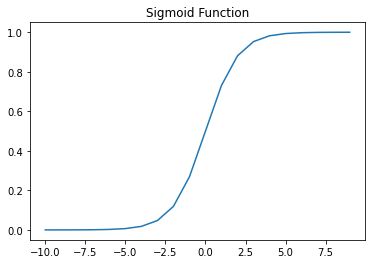

In [3]:
x = np.arange(-10, 10)
plt.figure()
plt.plot(x, [sigmoid(i) for i in x]);
plt.title('Sigmoid Function');

Definition of predict function

In [4]:
def predict(x, w, b):
    return sigmoid(np.dot(x, w) + b)

Before diving in, let's have an example for our function

In [5]:
x_train = np.array([[0.5, 0.5], [0.9, -0.8], [0, 0.9], [0.876, 0], [0.894, 0.1], [-0.99, 0.5],
                    [1, 1], [1.12, -1], [-1, 1.3], [-1.2, 1.1], [-1.14, -1], [-1, -1], [-1, 1]], dtype=np.longdouble)
y_train = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=np.longdouble)
w = np.zeros_like(x_train[0]); b = 0

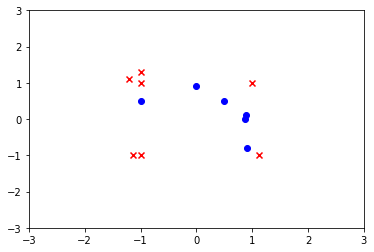

In [6]:
plt.figure()
plt.scatter(x_train[:6, 0], x_train[:6, 1], marker='o', c='blue')
plt.scatter(x_train[6:, 0], x_train[6:, 1], marker='x', c='red')
ax = plt.gca()
ax.set_xlim([-3, 3]);
ax.set_ylim([-3, 3]);

## Cost function
The cost function for Logistic regression is defined as <br>
$
\displaystyle
J(\overrightarrow{w}, b) = \frac{1}{m}\sum_{i=1}^{m}Loss(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}), y^{(i)})$
<br><br>
$
\begin{equation}
Loss(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}), y^{(i)}) = 
    \begin{cases}
        -log(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)})) & \text{if} y^{(i)}=1\\
        -log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)})) & \text{if} y^{(i)}=0\\
    \end{cases}
\end{equation}
$

we can write our $Loss$ function in a simpler way<br>
$
\begin{equation}
    Loss(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}), y^{(i)}) = -y^{(i)}log(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)})) - (1 - y^{(i)})log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}))
\end{equation}
$

and so our cost function will be<br>
$
\begin{equation}
\displaystyle
    J(\overrightarrow{w}, b) = -\frac{1}{m}\sum_{i=1}^{m}\biggr[y^{(i)}log(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)})) + (1 - y^{(i)})log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}))\biggl]
\end{equation}
$

In [7]:
def loss(x, y):
    return -1 * (y * np.log(x) + (1 - y) * np.log(1 - x))

In [8]:
def cost(X, y, w, b):
    err_sum = 0
    m = X.shape[0]
    for i in range(m):
        err_sum = err_sum + loss(predict(X[i], w, b), y[i])
    return err_sum / m

In [9]:
print(f'Current cost of our model is {cost(x_train, y_train, w, b)}')

Current cost of our model is 0.6931471805599453


## Gradient Descent
This one is the same as Gradient Descent for Linear Regression<br>
$
\bigg\{
\begin{gather*}
    w_j = w_j - \alpha\frac{d}{dw_j}J(\overrightarrow{w}, b) & j\dots n\\
    b = b - \alpha\frac{d}{db}J(\overrightarrow{w}, b)
\end{gather*}
\bigg\}
$
<br>
Also the derivatives are: <br>
$
\begin{equation}
\displaystyle
    \frac{d}{dw_j}J(\overrightarrow{w}, b) = \frac{1}{m}\sum_{i=1}^{m}\bigg(\big(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) - y^{(i)}\big)x_{j}^{(i)}\bigg)\\
\displaystyle
    \frac{d}{db}J(\overrightarrow{w}, b) = \frac{1}{m}\sum_{i=1}^{m}\bigg(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) - y^{(i)}\bigg)
\end{equation}
$

In [10]:
def gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = predict(X[i], w, b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (err * X[i, j])
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [11]:
def gradient_descent(X, y, init_w, init_b, alpha, cost_function, gradient_function, iterations=1000):
    w = copy.deepcopy(init_w)
    b = init_b
    
    for i in range(1, iterations + 1):
        dj_dw, dj_db = gradient(X, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        
        if i % 1000 == 0:
            calced_cost = cost_function(X, y, w, b)
            if str(calced_cost) != 'nan': print(f'i:{i} w={w} b={b} cost={calced_cost}')
            else: print(f'i:{i} w={w} b={b} cost=Small number')
    return w, b

Now let's define scale function to put our training data in [0, 1] interval

In [12]:
def scale(X):
    x_scale = copy.deepcopy(X)
    abs_max = np.abs(X).max()
    x_scale = x_scale / abs_max
    return x_scale, abs_max

## Train Data

In [13]:
x_scale, abs_max = scale(x_train)
w_out, b_out = gradient_descent(x_scale ** 2, y_train, w, b, 0.155, cost, gradient, 100000)

i:1000 w=[3.56571722 5.84135268] b=-4.156828641722336 cost=0.17453723867353127
i:2000 w=[4.95728555 7.94684875] b=-5.86397397372964 cost=0.11313951450130862
i:3000 w=[5.8405484  9.33345208] b=-6.985890197622908 cost=0.08735982862824179
i:4000 w=[ 6.49359204 10.39831422] b=-7.841043070866399 cost=0.07251147639387023
i:5000 w=[ 7.01495433 11.27584021] b=-8.540483911400226 cost=0.06260850562909243
i:6000 w=[ 7.4507387  12.02882936] b=-9.136609709624526 cost=0.055420644715225856
i:7000 w=[ 7.82621993 12.69210021] b=-9.658550687417113 cost=0.04990876083838014
i:8000 w=[ 8.15677003 13.28714848] b=-10.1242895160955 cost=0.04551614503428314
i:9000 w=[ 8.45245203 13.8282672 ] b=-10.545768143067644 cost=0.04191446391807252
i:10000 w=[ 8.72022534 14.32549208] b=-10.931356308857897 cost=0.038895968798812366
i:11000 w=[ 8.96511212 14.78616972] b=-11.287168416926548 cost=0.036321955014732586
i:12000 w=[ 9.19086142 15.21585848] b=-11.617820490933786 cost=0.034095806577756814
i:13000 w=[ 9.40035023 15

i:100000 w=[15.15577728 28.19468585] b=-21.158168278275298 cost=0.005795257375324294


### Trying to predict
When we have a point on or outside of the circle with radius 1 and C(0, 0) we should get 1 and zero otherwise

In [14]:
x_test = np.array([0.90, -0.90])
x_test = x_test / abs_max
predict(x_test**2, w_out, b_out)

0.40595147572520074

## Another example
In this example we use only one feature

In [15]:
x_train = np.array([0, 1, 2, 3, 3.5, 5, 6, 7, 8, 9], dtype=np.longdouble)
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=np.longdouble)
x_train = x_train.reshape((-1, 1))
alpha = 0.1
x_scale, abs_max = scale(x_train)
w = np.zeros_like(x_train[0], dtype=np.longdouble)

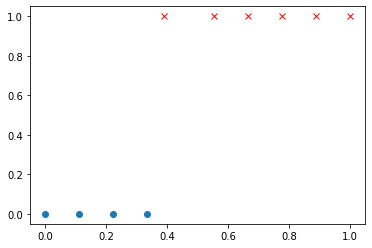

In [16]:
plt.scatter(x_scale[:4], y_train[:4], marker='o')
plt.scatter(x_scale[4:], y_train[4:], c='red', marker='x', linewidths=1);

In [ ]:
w_out, b_out = gradient_descent(x_scale, y_train, w, 0, 0.5, cost, gradient, 50000)

i:1000 w=[11.40284865] b=-4.201595713146906 cost=0.14932444898238076
i:2000 w=[14.75735041] b=-5.4139274249058635 cost=0.12334594814242035
i:3000 w=[17.06802309] b=-6.238839111578875 cost=0.11123300680799922
i:4000 w=[18.9149643] b=-6.895895926079552 cost=0.10352648819614226
i:5000 w=[20.49356056] b=-7.457056363359226 cost=0.09790466590095112
i:6000 w=[21.89500947] b=-7.955401097132316 cost=0.09347601901066256
i:7000 w=[23.16969605] b=-8.40902039795639 cost=0.08981276243597751
i:8000 w=[24.34855072] b=-8.828936820851037 cost=0.08667948962640029
i:9000 w=[25.45199238] b=-9.222385627539925 cost=0.08393395107007118
i:10000 w=[26.49423915] b=-9.594382513814608 cost=0.08148412011048761
i:11000 w=[27.48560475] b=-9.948552994556621 cost=0.07926728017833448
i:12000 w=[28.4338171] b=-10.287605962053973 cost=0.07723889749648906
i:13000 w=[29.34482133] b=-10.613620670583009 cost=0.07536627941426834
i:14000 w=[30.22329234] b=-10.92822918304224 cost=0.073624755618275
i:15000 w=[31.07297498] b=-11.2

In [ ]:
plt.scatter(x_scale[:4], y_train[:4], marker='o')
plt.scatter(x_scale[4:], y_train[4:], c='red', marker='x', linewidths=1);
y_out = [predict(i, w_out, b_out) for i in x_scale]
plt.plot(x_scale, y_out)

x_num = np.linspace(x_scale.min(), x_scale.max(), 10)
x_num_out = w_out * x_num + b_out
plt.plot(x_num, x_num_out)
ax = plt.gca()
ax.set_ylim([-0.06, 1.06]);

The end.